In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Integrator (1st order, 2D) for stochastic differential equation. Viscosity is set to 1 !!
# 'dt' is the integration time step
# 'kBT' is the thermal energy (relating to diffusion)
# 'fExt'is the instantaneous external force
# -> returns the position increment dr
def IntegrationStep(dt,kBT,fExt):
    return fExt*dt + np.sqrt(2.*kBT*dt)*np.random.normal(0,1,2)

# External force - Harmonic potential 
# 'r' is the agent position
# 'r0' is the center of the potential
# 'k' is the potential stiffness
# -> returns the force vector
def HarmonicPotential(r,r0,k):
    return -k*(r-r0)

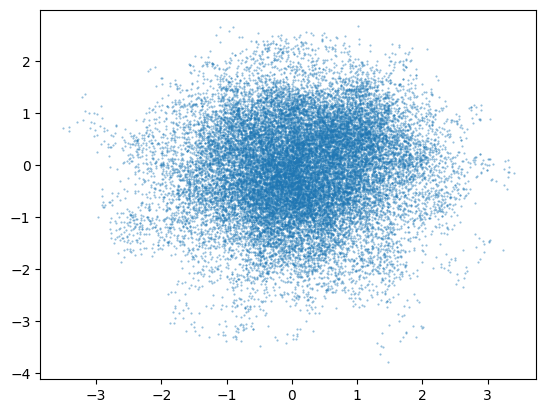

In [3]:
# ---------------------------------------------------------------------------
# --------------------------------- MAIN ------------------------------------
# ---------------------------------------------------------------------------

# Definition of variables ---------------------------------------------------

boxLength = 10; # Simulation box size
tMax = 25000; # Simulation time
fExt = np.array([0,0]) # External force vector
kBT = 1; # Inverse thermal energy
dt = 0.01; # Integration time step
k = 1; # Potential stiffness (2D harmonic potential)

# Initial conditions --------------------------------------------------------

r = np.array([boxLength/2.,boxLength/2.]) # Agent's initial position (2D) 
x = np.array([r[0]]) # Store the agent's x-position 
y = np.array([r[1]]) # Store the agent's y-position 

# Time propagation ----------------------------------------------------------

for i in range(tMax):
    
    fExt = HarmonicPotential(r,np.array([boxLength/2.,boxLength/2.]),k) # External force 
    
    r += IntegrationStep(dt,kBT,fExt) # Integration of the agent's position
    r = r % boxLength # Application of Periodic Boundary Conditions
    
    x = np.append(x,r[0]) # Store the agent's x-position
    y = np.append(y,r[1]) # Store the agent's y-position

# Visualization  ---------------------------------------------------------- 

x -= boxLength/2. # Center the simulation box at (0,0)
y -= boxLength/2. # Center the simulation box at (0,0)

plt.scatter(x,y,s=0.25,alpha=0.5) # Visualize the agent's trajectory
plt.show()



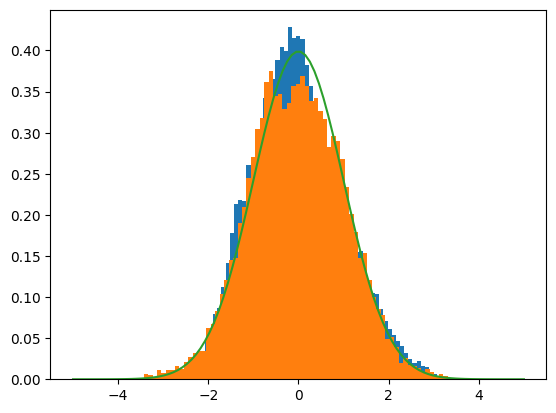

In [163]:
# Comparison Theory Vs. Simulations  --------------------------------------

xth = np.linspace(-boxLength/2.,boxLength/2.,num=100) # x-range for theory
yth = np.sqrt(k/(2*np.pi*kBT))*np.exp(-k*(xth**2)/(2*kBT)) # theoretical PDF

# Visualization  ---------------------------------------------------------- 

fig, ax = plt.subplots()
ax.hist(x, bins='auto', density='true'); # histogram for x-coordinate
ax.hist(y, bins='auto', density='true'); # histogram for y-coordinate
ax.plot(xth,yth) # superimpose theory
plt.show()